In [12]:
import pandas as pd
print("hello")
import seaborn as sns


hello


In [ ]:



# Read the CSV file
df = pd.read_csv("Datasets/Epoch_benchmarks.csv")
#remove nan entries in model size and dataset size
df = df.dropna(subset=["Model size"])
df = df.dropna(subset=["Dataset size"])
df = df.dropna(subset=["MMLU"])

# Sort data by the date to ensure it's in order
#extract the number of parameters and amount of data
# df['Parameters'] = df['Model size'].str.extract('(\d+)')
# df['Data'] = df['Dataset size'].str.extract('(\d+)')
df['Parameters'] = pd.to_numeric(df['Model size'].astype(str).apply(lambda x: float(x)))
df['Data'] = pd.to_numeric(df['Dataset size'].astype(str).apply(lambda x: float(x)))

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


L0 = 1.69
A = 406.4
B = 410.7
alpha = 0.34
beta = 0.28
#compute the loss based on parameters and data size
loss = lambda x, y: (A/x**alpha)+(B/y**beta) +L0
df['Loss'] = loss(df['Parameters'], df['Data'])

# Assuming you have your DataFrame 'df' ready
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Example data (remove this and use your actual DataFrame)
# For demonstration purposes, here's some synthetic data resembling a sigmoid
# x = np.linspace(0, 10, 100)
# y = 100 / (1 + np.exp(-1 * (x - 5))) + np.random.normal(0, 5, x.size)
# df = pd.DataFrame({'Loss': x, 'MMLU': y})

x_data = df['Loss'].values
y_data = df['MMLU'].values

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b



initial_guess = [
    max(y_data),          # L
    np.median(x_data),    # x0
    1,                    # k
    min(y_data)           # b
]

try:
    popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=initial_guess, maxfev=10000)
    L, x0, k, b = popt
    print(f"Fitted parameters:\nL = {L}\nx0 = {x0}\nk = {k}\nb = {b}")
except RuntimeError as e:
    print("Error - curve_fit failed:", e)

# Plotting


x_fit = np.linspace(min(x_data)-0.5, max(x_data), 500)
y_fit = sigmoid(x_fit, *popt)

Fitted parameters:
L = 0.5566859825577314
x0 = 1.9739480423345785
k = -23.774928114776312
b = 0.2540434458699578


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_96326/3554717845.py:29: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b


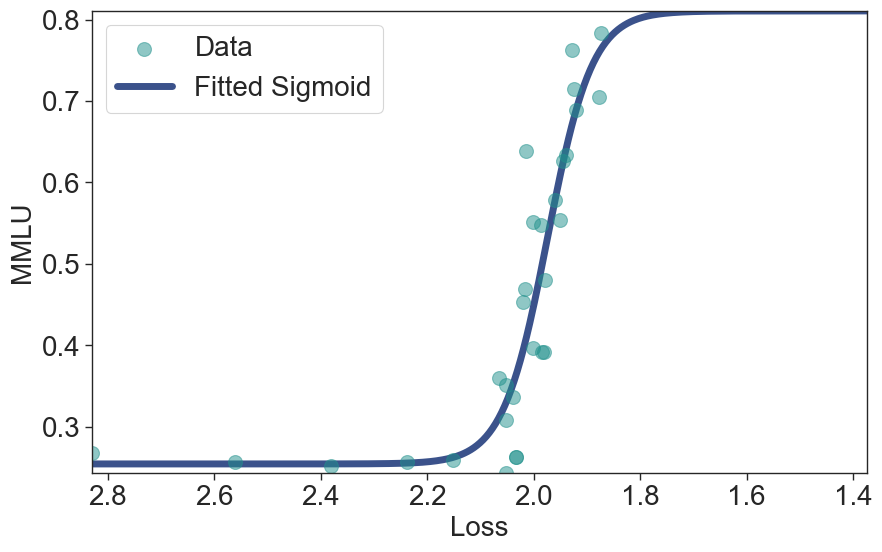

In [22]:



sns.set_style("ticks")
sns.set_context("paper")
colors = sns.color_palette("viridis", n_colors=3)
# plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data',  alpha=0.5, s=100, color=colors[1])
plt.plot(x_fit, y_fit,  label='Fitted Sigmoid', linewidth=5, zorder=-10, color=colors[0])

plt.xlabel('Loss', fontsize=20)
plt.ylabel('MMLU', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('Loss vs MMLU with Fitted Sigmoid', fontsize=25, fontweight='bold')
# plt.grid(True, alpha=0.9, linestyle='--')
plt.gca().invert_xaxis()
plt.legend(fontsize=20)
plt.savefig("Figures/Loss_vs_MMLU.png", dpi=300, bbox_inches='tight')
plt.margins(0,0)
plt.show()
